In [ ]:
#pip install python-bcb

In [2]:
from bcb import sgs
import pandas as pd

In [3]:
df_bcb = sgs.get({'selic_meta_%aa': 432, 'ipca_%am': 433}, start='2016-01-01', end='2018-12-31')

In [4]:
print(df_bcb.head()) 

            selic_meta_%aa  ipca_%am
Date                                
2016-01-01           14.25      1.27
2016-01-02           14.25       NaN
2016-01-03           14.25       NaN
2016-01-04           14.25       NaN
2016-01-05           14.25       NaN


In [5]:
df_bcb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Freq: D
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selic_meta_%aa  1096 non-null   float64
 1   ipca_%am        36 non-null     float64
dtypes: float64(2)
memory usage: 25.7 KB


In [6]:
df_bcb.value_counts()

selic_meta_%aa  ipca_%am
6.50            -0.21       1
                -0.09       1
                 0.15       1
                 0.22       1
                 0.33       1
                 0.40       1
                 0.45       1
                 0.48       1
                 1.26       1
6.75             0.09       1
7.00             0.29       1
                 0.32       1
7.50             0.28       1
                 0.44       1
8.25             0.42       1
9.25             0.16       1
                 0.19       1
10.25           -0.23       1
                 0.24       1
11.25            0.31       1
12.25            0.14       1
                 0.25       1
13.00            0.33       1
13.75            0.30       1
                 0.38       1
14.00            0.18       1
14.25            0.08       1
                 0.26       1
                 0.35       1
                 0.43       1
                 0.44       1
                 0.52       1
               

In [7]:
df_bcb['ipca_am'] = df_bcb['ipca_%am'] / 100 # converão para ipca mensal (decimal)
df_bcb['selic_meta_am'] = ((1 + (df_bcb['selic_meta_%aa'] / 100)) ** (1/12)) - 1 # conversão selic anualizada (percentual) para selic mensal (decimal)
df_bcb['selic_real_am'] = ((1 + df_bcb['selic_meta_am']) / (1 + df_bcb['ipca_am'])) - 1 # fórmula de Fisher

In [8]:
df_bcb.head()

,selic_meta_%aa,ipca_%am,ipca_am,selic_meta_am,selic_real_am
Date,,,,,
2016-01-01,14.25,1.27,0.0127,0.011163,-0.001517
2016-01-02,14.25,NaN,NaN,0.011163,NaN
2016-01-03,14.25,NaN,NaN,0.011163,NaN
2016-01-04,14.25,NaN,NaN,0.011163,NaN
2016-01-05,14.25,NaN,NaN,0.011163,NaN


In [9]:
df_bcb.index = pd.to_datetime(df_bcb.index) # garantir que Index seja um datetime
df_bcb.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1096, freq='D')

In [12]:
df_bcb_mensal = df_bcb.resample('ME').agg({
    'ipca_am': 'max', 
    'selic_meta_am': 'mean'
}) # agrupar os dados para frequência mensal

In [13]:
df_bcb_mensal['selic_real_am'] = ((1 + df_bcb_mensal['selic_meta_am']) / (1 + df_bcb_mensal['ipca_am'])) - 1 # calcular o juro real mensal sobre os dados agragados e após o resample para evitar distorções de NaNs diários

In [14]:
df_bcb_mensal.dropna(subset=['ipca_am'], inplace=True) # remove meses que não possuem dados de ipca

In [15]:
print(df_bcb_mensal.head(), df_bcb_mensal.tail())

            ipca_am  selic_meta_am  selic_real_am
Date                                             
2016-01-31   0.0127       0.011163      -0.001517
2016-02-29   0.0090       0.011163       0.002144
2016-03-31   0.0043       0.011163       0.006834
2016-04-30   0.0061       0.011163       0.005033
2016-05-31   0.0078       0.011163       0.003337             ipca_am  selic_meta_am  selic_real_am
Date                                             
2018-08-31  -0.0009       0.005262       0.006167
2018-09-30   0.0048       0.005262       0.000459
2018-10-31   0.0045       0.005262       0.000758
2018-11-30  -0.0021       0.005262       0.007377
2018-12-31   0.0015       0.005262       0.003756


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
PALETA_OLIST = ["#0047bb", "#94a3b8", "#1e293b", "#3b82f6", "#e2e8f0"] # configuração gráfica da equipe
sns.set_theme(style="whitegrid")

plt.rcParams.update({
    'axes.prop_cycle': plt.cycler(color=PALETA_OLIST),
    'figure.figsize': (12, 8),
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.edgecolor': '#94a3b8'
})

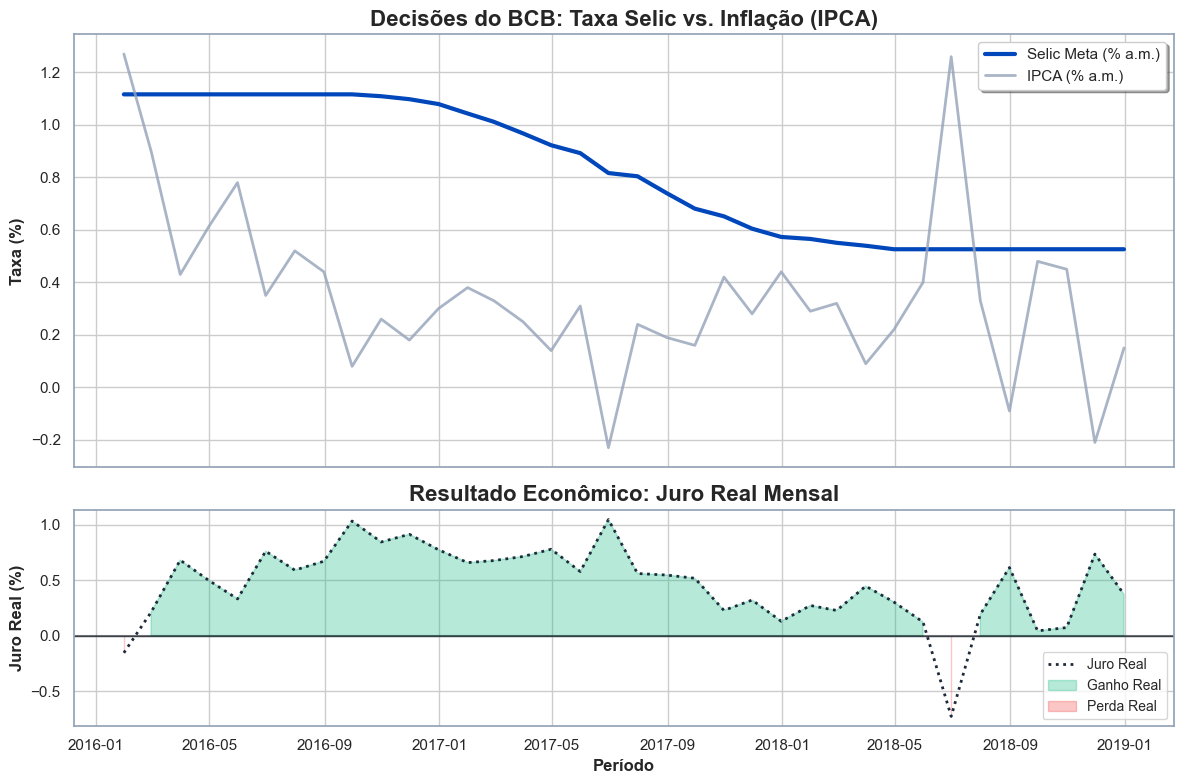

In [18]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ax1.plot(df_bcb_mensal.index, df_bcb_mensal['selic_meta_am'] * 100, 
        label='Selic Meta (% a.m.)', color=PALETA_OLIST[0], linewidth=3)
ax1.plot(df_bcb_mensal.index, df_bcb_mensal['ipca_am'] * 100, 
        label='IPCA (% a.m.)', color=PALETA_OLIST[1], linewidth=2, alpha=0.8)

ax1.set_title('Decisões do BCB: Taxa Selic vs. Inflação (IPCA)')
ax1.set_ylabel('Taxa (%)')
ax1.legend(loc='upper right', frameon=True, shadow=True)

juro_real_pct = df_bcb_mensal['selic_real_am'] * 100

ax2.plot(df_bcb_mensal.index, juro_real_pct, 
        label='Juro Real', color=PALETA_OLIST[2], linewidth=2, linestyle=':')


ax2.axhline(0, color='black', linewidth=1.5, alpha=0.5)


ax2.fill_between(df_bcb_mensal.index, juro_real_pct, 0, 
                where=(juro_real_pct >= 0), color='#10b981', alpha=0.3, label='Ganho Real')
ax2.fill_between(df_bcb_mensal.index, juro_real_pct, 0, 
                where=(juro_real_pct < 0), color='#ef4444', alpha=0.3, label='Perda Real')


ax2.axhline(0, color=PALETA_OLIST[2], linewidth=1, alpha=0.6)

ax2.set_title('Resultado Econômico: Juro Real Mensal')
ax2.set_ylabel('Juro Real (%)')
ax2.set_xlabel('Período')
ax2.legend(loc='lower right', fontsize='small')


plt.tight_layout()
plt.savefig('analise_macro.png', dpi=300)
plt.show()

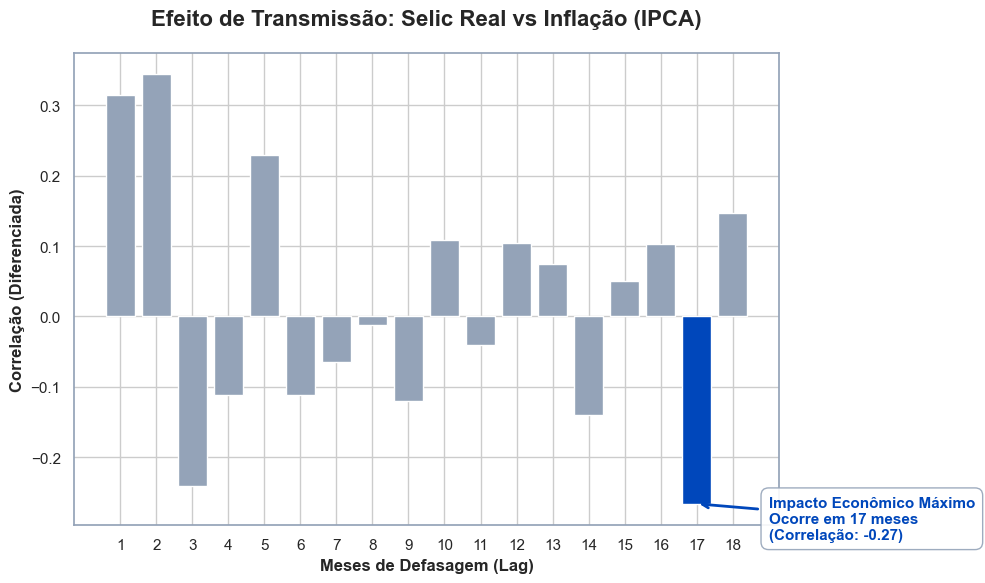

In [18]:
# 2. Cálculo da correlação (usando os dados diferenciados para precisão)
lags = np.arange(1, 19) # Começamos do 1 para ignorar o artefato do Lag 0
corrs = [df_bcb_mensal['ipca_am'].diff().corr(df_bcb_mensal['selic_real_am'].diff().shift(l)) for l in lags]

max_lag = np.nanargmin(corrs) + 1 # +1 pois o índice 0 da lista é o lag 1
max_corr = corrs[max_lag - 1]

fig, ax = plt.subplots(figsize=(10, 6))

cores_barras = [PALETA_OLIST[0] if i == max_lag else PALETA_OLIST[1] for i in lags]

ax.bar(lags, corrs, color=cores_barras, edgecolor='white')

ax.set_title('Efeito de Transmissão: Selic Real vs Inflação (IPCA)', pad=20)
ax.set_xlabel('Meses de Defasagem (Lag)')
ax.set_ylabel('Correlação (Diferenciada)')
ax.set_xticks(lags)

ax.annotate(f'Impacto Econômico Máximo\nOcorre em {max_lag} meses\n(Correlação: {max_corr:.2f})', 
        xy=(max_lag, max_corr), 
        xytext=(max_lag + 2, max_corr - 0.05),
        arrowprops=dict(arrowstyle='->', color=PALETA_OLIST[0], lw=2),
        fontsize=11, fontweight='bold', color=PALETA_OLIST[0],
        bbox=dict(boxstyle='round,pad=0.5', fc='white', ec=PALETA_OLIST[1], alpha=0.9))

plt.tight_layout()
plt.savefig('correlograma_final.png', dpi=300)
plt.show()

In [19]:
r_quadrado = max_corr**2
print(f'Juro Real explica sozinho aproximadamente {r_quadrado * 100:.2f}% da variação da inflação no período.')

Juro Real explica sozinho aproximadamente 7.09% da variação da inflação no período.


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler() # instanciar o escalonador

In [22]:
colunas = ['selic_meta_am', 'ipca_am', 'selic_real_am']

In [23]:
df_bcb_mensal[['selic_std', 'ipca_std', 'selic_real_std']] = scaler.fit_transform(df_bcb_mensal[colunas]) # criando colunas com as variaveis padronizadas

In [24]:
print(df_bcb_mensal[['selic_std', 'ipca_std', 'selic_real_std']].describe().round(2)) # confirmando a transformação com os valores das médias e desvios padrão

       selic_std  ipca_std  selic_real_std
count      36.00     36.00           36.00
mean        0.00     -0.00           -0.00
std         1.01      1.01            1.01
min        -1.15     -1.86           -3.40
25%        -1.11     -0.53           -0.67
50%        -0.03     -0.12            0.20
75%         1.16      0.28            0.65
max         1.18      2.92            1.68


In [25]:
df_bcb_mensal[['selic_std', 'ipca_std', 'selic_real_std']] = df_bcb_mensal[['selic_std', 'ipca_std', 'selic_real_std']].round(2)

In [26]:
df_bcb_mensal.head(10)

,ipca_am,selic_meta_am,selic_real_am,selic_std,ipca_std,selic_real_std
Date,,,,,,
2016-01-31,0.0127,0.011163,-0.001517,1.18,2.92,-1.76
2016-02-29,0.0090,0.011163,0.002144,1.18,1.74,-0.71
2016-03-31,0.0043,0.011163,0.006834,1.18,0.24,0.63
2016-04-30,0.0061,0.011163,0.005033,1.18,0.82,0.11
2016-05-31,0.0078,0.011163,0.003337,1.18,1.36,-0.37
2016-06-30,0.0035,0.011163,0.007637,1.18,-0.01,0.86
2016-07-31,0.0052,0.011163,0.005933,1.18,0.53,0.37
2016-08-31,0.0044,0.011163,0.006734,1.18,0.28,0.60
2016-09-30,0.0008,0.011163,0.010355,1.18,-0.87,1.64


In [27]:
df_entrega = df_bcb_mensal.reset_index() # resetando o índice para que a data vire uma coluna comum

In [28]:
df_entrega.head()

,Date,ipca_am,selic_meta_am,selic_real_am,selic_std,ipca_std,selic_real_std
0,2016-01-31,0.0127,0.011163,-0.001517,1.18,2.92,-1.76
1,2016-02-29,0.0090,0.011163,0.002144,1.18,1.74,-0.71
2,2016-03-31,0.0043,0.011163,0.006834,1.18,0.24,0.63
3,2016-04-30,0.0061,0.011163,0.005033,1.18,0.82,0.11
4,2016-05-31,0.0078,0.011163,0.003337,1.18,1.36,-0.37


In [29]:
df_entrega.to_csv('analise_ipca_selic_processado_atualizado.csv', index=False)